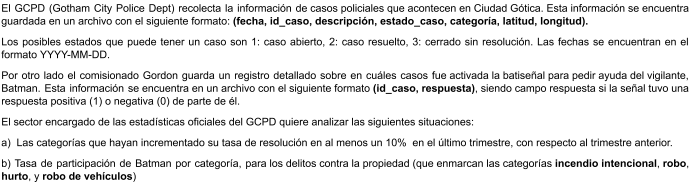 

In [116]:
import pandas as pd
#caso (fecha, id_caso, descripcion, estado_caso, categoria, latitud, longitud)
casos = pd.read_csv("caso.csv")

señal = pd.read_csv("señal.csv")
# id_caso, respuesta (0, 1, none)


In [117]:
casos = casos[casos["fecha"]>"2017-03-00"]

In [118]:
def trimestre(x):
    if x > "2017-07-00":
        return 3
    return 2

trimestre("2019-07-11")

3

In [119]:
casos["trim"] = casos.fecha.transform(lambda x: trimestre(x))

In [120]:
casos = casos.groupby(["categoria","estado_caso","trim"]).id_caso.count().transform(lambda x: x*100/x.sum())

In [125]:
casos = casos.reset_index()
casos = casos [casos.reset_index()["estado_caso"]==2]#.iloc[0:3,0] #.unstack(level=[1,2],fill_value=0)

In [129]:
def filtrar(x):
    cat = x.categoria
    trim = x.trim
    valor = x.id_caso
    if trim == 2:
        result = x[ (x["categoria"] == cat) and (x["trim"]==3)]
        if result*0.1 > valor:
            return True
        
filtrar.vectorizice()

AttributeError: 'function' object has no attribute 'vectorizice'

In [128]:
casos = casos[filtrar(casos)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().